# HOMEWORK 13

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [3]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

In [1]:
from zipfile import ZipFile
import os

# because original dataset has different data structure and image format I decided to download archive manually and store it inside
# github also does not allow large files so archive.zip is added to gitignore and will not be tracked by version control system
asset_zip_path = os.path.join(os.getcwd(), "data/archive.zip")

try:
    # Extracting zip file using the zipfile package.
    with ZipFile(asset_zip_path) as file:
        # Extract ZIP file contents in the same directory.
        file.extractall(os.path.split(asset_zip_path)[0])
except Exception as e:
    print("\nInvalid file.", e)


### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/000

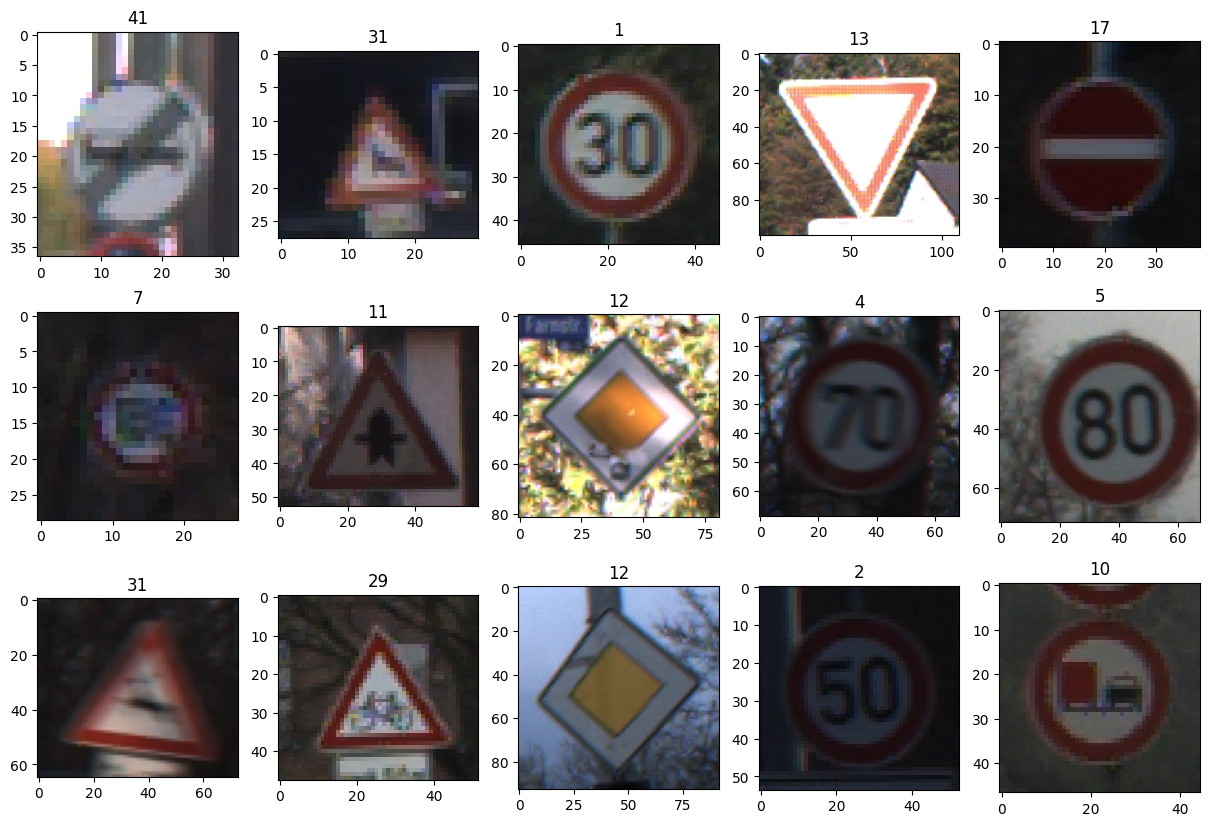

In [4]:
# Load the training labels
root = 'data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

#Number of training samples (amount of samples in data)
num_samples = data.shape[0]

print(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [5]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

print(ids)

0        20
1        20
2        20
3        20
4        20
         ..
39204    42
39205    42
39206    42
39207    42
39208    42
Name: ClassId, Length: 39209, dtype: int64


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

210
2250


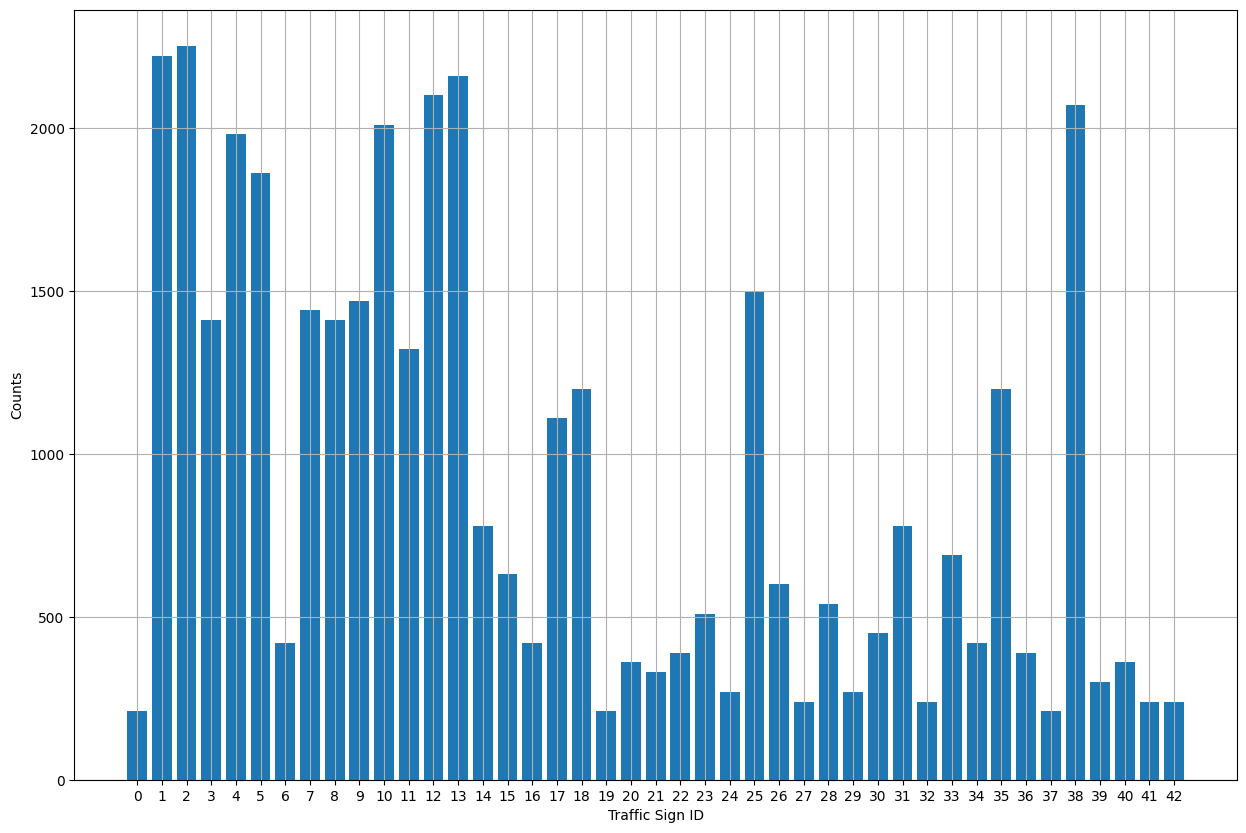

In [6]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xticks(list(hist.keys()))
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

print(min(hist.values()))
print(max(hist.values()))

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

### Answers

#### Do you consider the dataset to be balanced? If so, why? If not, why?

No, dataset is not balanced. Looking at classes fractions graph below we can see that some classes occur 10 times often than others. 

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

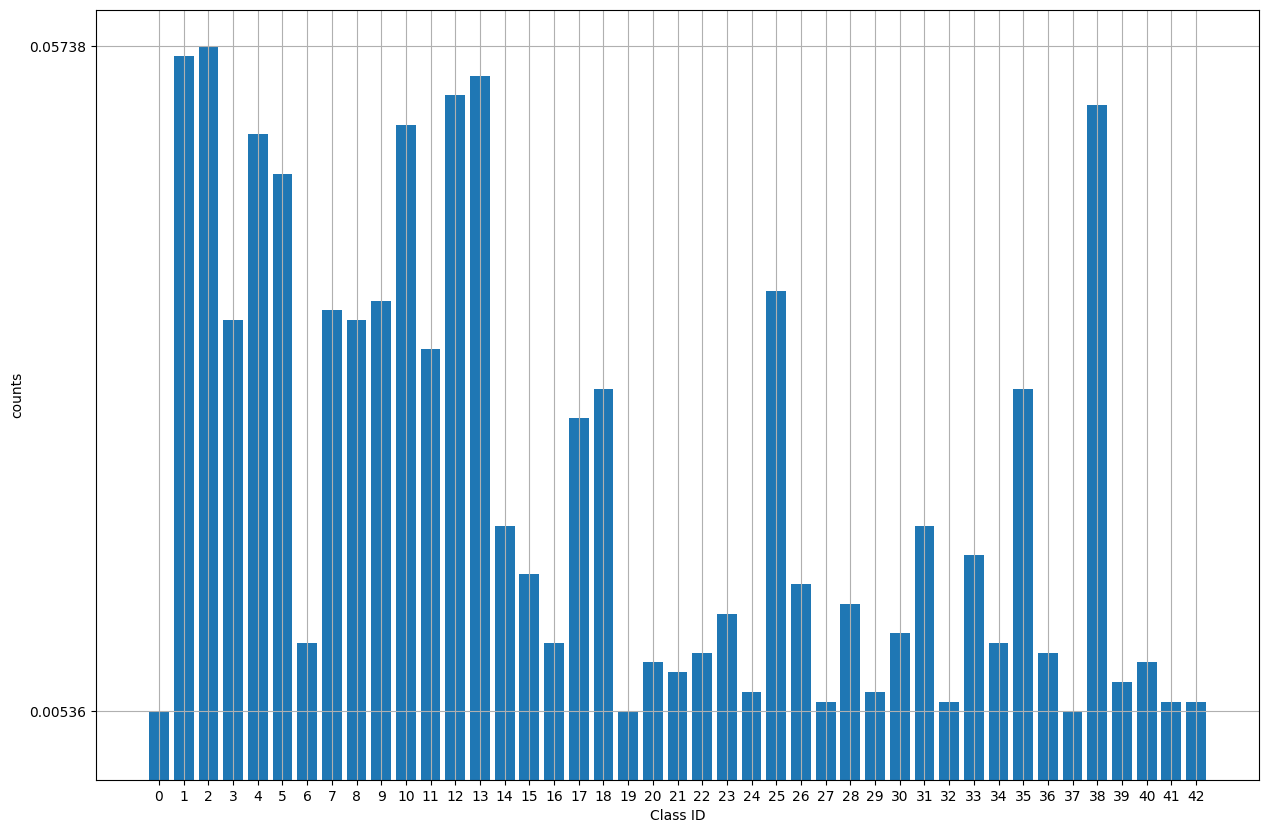

In [7]:
relative_values = np.array(list(hist.values())) / num_samples
plt.bar(hist.keys(), relative_values), plt.grid(True)
plt.xticks(list(hist.keys()))
plt.yticks([max(relative_values), min(relative_values)])
plt.xlabel('Class ID'), plt.ylabel('counts')


#### Are there any classes that are (significantly) over-represented or under-represented?

Yes, for example classes 1, 2, 4, 10, 12, 13 are over-represented (> 2000 occurences), and classes 0, 37, 41, 42 are under-represented (> 200 occurences). 

In [8]:
print('Over-represented')
print(hist[1])
print(hist[2])
print(hist[4])
print(hist[10])
print(hist[12])
print(hist[13])

print('Under-represented')
print(hist[37])
print(hist[41])
print(hist[42])

Over-represented
2220
2250
1980
2010
2100
2160
Under-represented
210
240
240


#### Perform a further analysis on the dataset and draw some conclusion from it.
Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

25
243
25
225


(Text(0.5, 0, 'Width'), Text(0, 0.5, 'Height'))

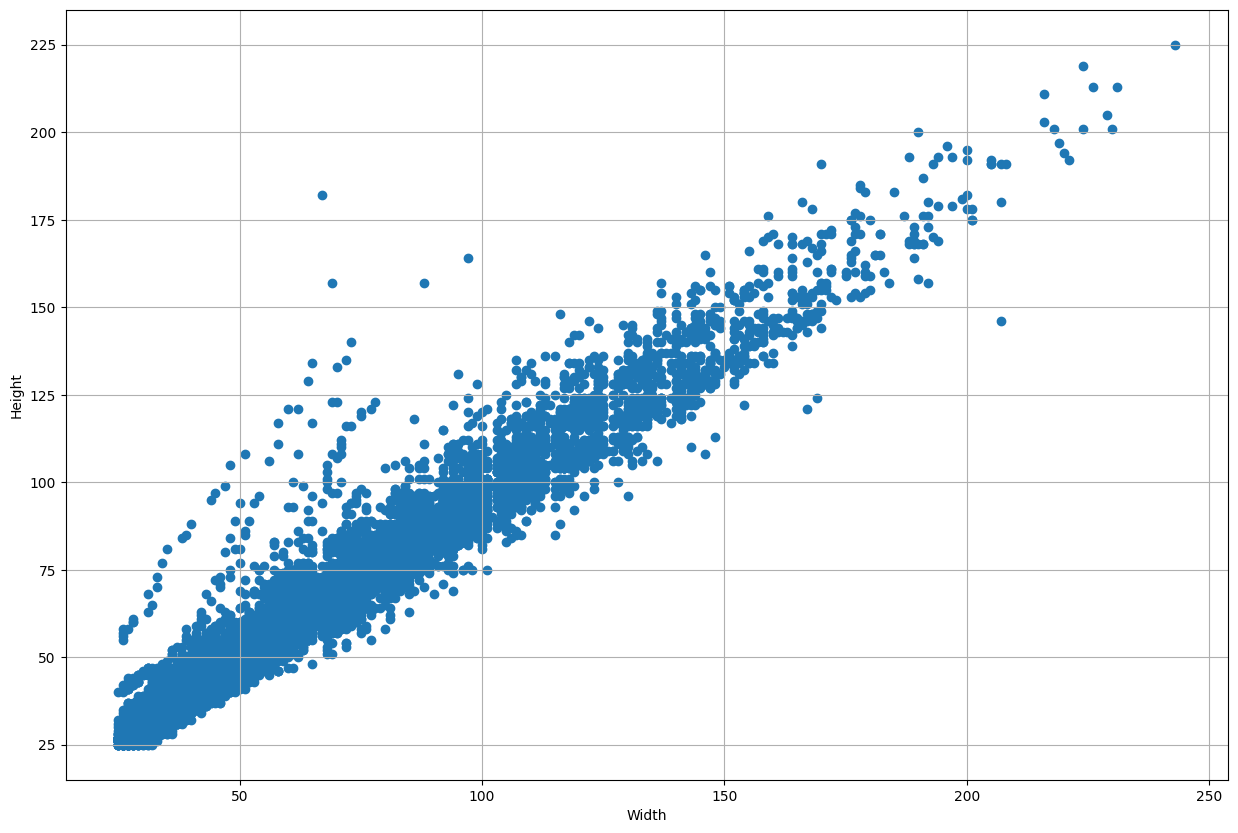

In [9]:
widths = data['Width']
heights = data['Height']

print(min(widths))
print(max(widths))

print(min(heights))
print(max(heights))

plt.scatter(widths, heights), plt.grid(True)
plt.xlabel('Width'), plt.ylabel('Height')

This dataset images' resolutions have wide dynamic range. To use this dataset with neural network, we need to resize images to one size first.

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Average Brightness Per Class'))

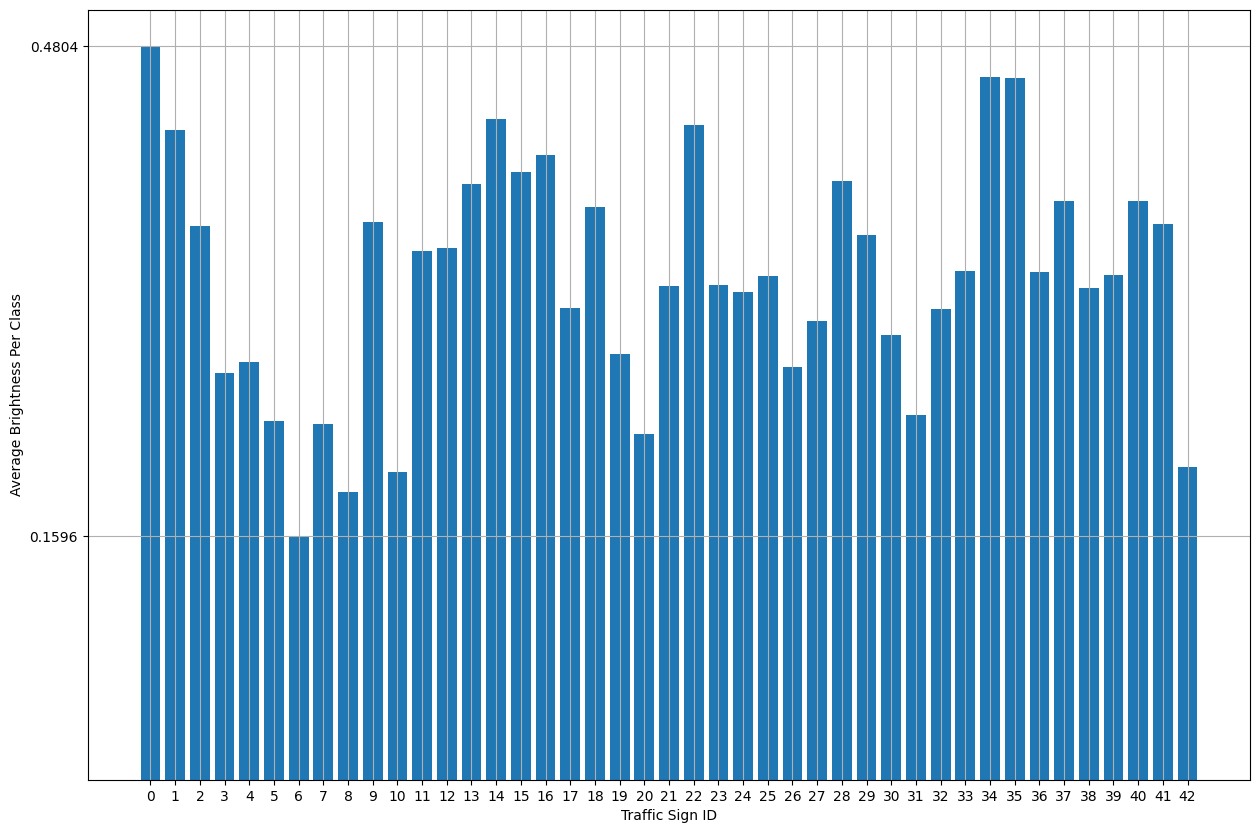

In [10]:
from collections import defaultdict
brightness = defaultdict(list)

for idx,row in data.iterrows():
    class_id = row['ClassId']
    img = cv2.imread(os.path.join(root, row['Path']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    mean = np.mean(img)
    brightness[class_id].append(mean)

res = {k: np.mean(v) for k, v in brightness.items()}

plt.bar(res.keys(), res.values()), plt.grid(True)
plt.xticks(list(res.keys()))
plt.yticks([max(res.values()), min(res.values())])
plt.xlabel('Traffic Sign ID'), plt.ylabel('Average Brightness Per Class')


Yes, for example images with class id 0 are brighter on average than others. We can see on graph below that signs from class 0 were mostly taken at daytime, this is why they are brighter than others. As for least bright class, this is class 6, images are taken at night or in the evening mostly.

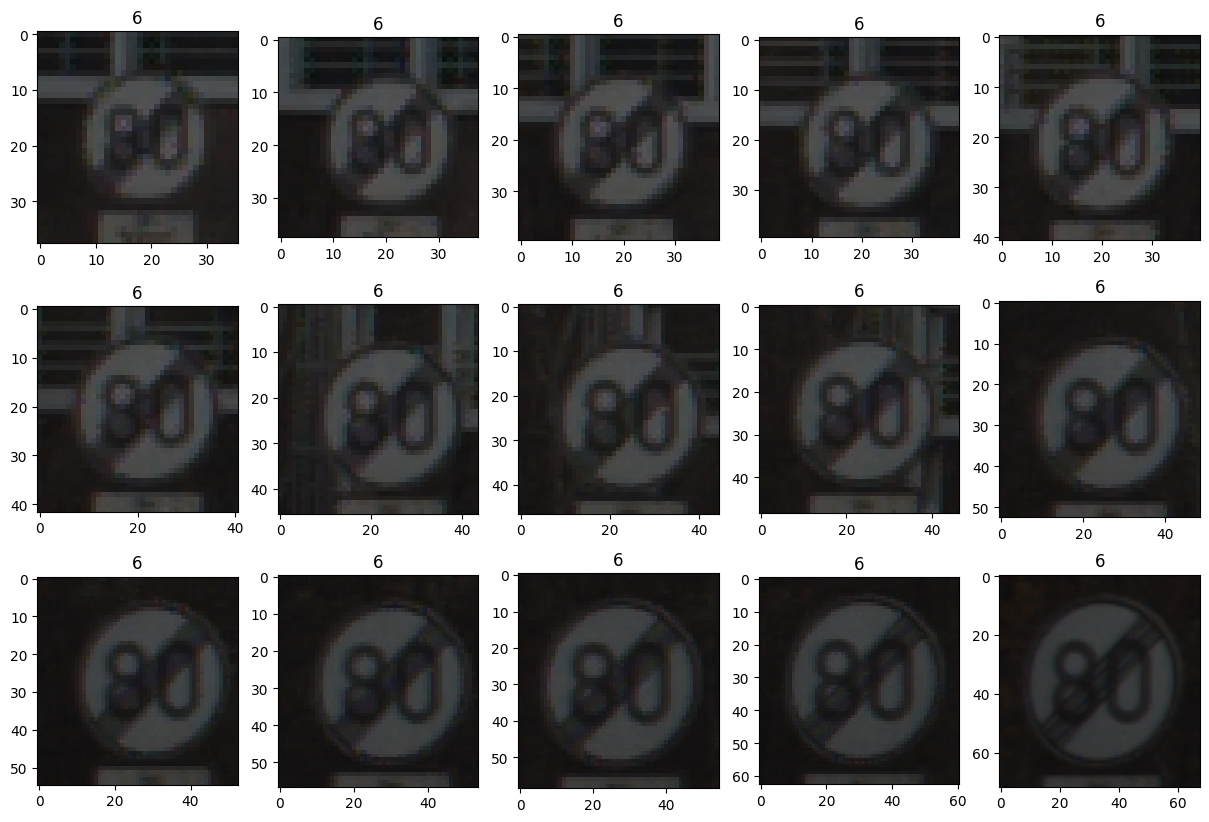

In [11]:
res = data[data.ClassId == 6].tail(15)
index = 0
for _, row in res.iterrows():
    # Load image
    path = os.path.join(root, row['Path'])
    img = cv2.imread(path)
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,index+1), plt.imshow(img), plt.title(row['ClassId'])
    index += 1